In [3]:
from imutils import paths
import os
import librosa
import numpy as np


def getMFCC(i):
  signal, sr = librosa.load(i, sr=16000)

  # MFCC를 통한 특징 벡터 추출 (n_mfcc=36)
  MFCCs = librosa.feature.mfcc(signal, sr, n_fft=400, hop_length=160, n_mfcc=36)
  return MFCCs

forder = '/content/drive/MyDrive/cut4/cut4/'
files = paths.list_files(forder)

dataset=[]
label=[] 

for i in files:
  mfcc=getMFCC(i)
  dataset.append(mfcc.reshape(-1)) # 1차원 배열로 반환
  label.append((os.path.basename(i)).split('_')[1]) # 파일의 이름에서 감정을 나타내는 부분을 추출해서 저장


from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
encoder = LabelEncoder()

encoder.fit(label)
y = encoder.transform(label)


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터와 훈련 데이터 split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 42, shuffle = True)

# 커널 설정
clf = SVC(C=20, kernel = 'rbf', probability=True)

#MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(clf.score(X_test_scaled, y_test))



0.8189189189189189


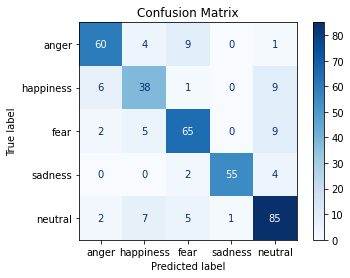

In [5]:
from imutils import paths
import os
import librosa
import numpy as np


def getMFCC(i):
  signal, sr = librosa.load(i, sr=16000)

  # MFCC를 통한 특징 벡터 추출 (n_mfcc=36)
  MFCCs = librosa.feature.mfcc(signal, sr, n_fft=400, hop_length=160, n_mfcc=36)
  return MFCCs

forder = '/content/drive/MyDrive/cut4/cut4/'
files = paths.list_files(forder)

dataset=[]
label=[] 

for i in files:
  mfcc=getMFCC(i)
  dataset.append(mfcc.reshape(-1)) # 1차원 배열로 반환
  label.append((os.path.basename(i)).split('_')[1]) # 파일의 이름에서 감정을 나타내는 부분을 추출해서 저장


from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
encoder = LabelEncoder()

encoder.fit(label)
y = encoder.transform(label)


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터와 훈련 데이터 split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 42, shuffle = True)

# 커널 설정
clf = SVC(C=5, kernel = 'rbf', probability=True)

#MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
clf.fit(X_train_scaled, y_train)


# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


labels=['anger', 'happiness', 'fear', 'sadness', 'neutral']
disp = plot_confusion_matrix(clf, 
                             X_test_scaled, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Blues, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

In [ ]:
from imutils import paths
import os
import librosa
import numpy as np

# 라벨 저장 확인용

forder = '/content/drive/MyDrive/cut4/cut4/'
files = paths.list_files(forder)

dataset=[]
label=[] 

k=0

for i in files:
  if k>100:
    break;
 # mfcc=getMFCC(i)
 # dataset.append(mfcc.reshape(-1))
  label.append((os.path.basename(i)).split('_')[1])
  k+=1


from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
encoder = LabelEncoder()

encoder.fit(label)
y = encoder.transform(label)

print(label)
print(y)

['anger', 'anger', 'anger', 'neutral', 'neutral', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'fear', 'fear', 'fear', 'happiness', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'neutral', 'neutral', 'sadness', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sadness', 'anger', 'sadness', 'anger', 'sadness', 'anger', 'sadness', 'sadness', 'sadness', 'sadness'

In [ ]:
from imutils import paths
import os
import librosa
import numpy as np


def getMFCC(i):
  signal, sr = librosa.load(i, sr=16000)

  # MFCC를 통한 특징 벡터 추출 (n_mfcc=36)
  MFCCs = librosa.feature.mfcc(signal, sr, n_fft=400, hop_length=160, n_mfcc=36)
  return MFCCs

forder = '/content/drive/MyDrive/cut2'
files = paths.list_files(forder)

dataset=[]
label=[] 

for i in files:
  mfcc=getMFCC(i)
  dataset.append(mfcc.reshape(-1)) # 1차원 배열로 반환
  label.append((os.path.basename(i)).split('_')[1]) # 파일의 이름에서 감정을 나타내는 부분을 추출해서 저장


from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
encoder = LabelEncoder()

encoder.fit(label)
y = encoder.transform(label)


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 학습 데이터와 훈련 데이터 split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 42, shuffle = True)
# 커널 설정
clf = SVC(kernel = 'rbf', probability=True)

#MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 그리드 서치
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],"gamma" : [0.01,0.05,0.1,0.5,1,5,10]}

grid = GridSearchCV(SVC(kernel = 'linear'),param_grid=param_grid,scoring ="accuracy", n_jobs=4)
grid.fit(X_train_scaled,y_train)
y_pred = grid.predict(X_test_scaled)
print(grid.best_params_)
print(grid.best_score_)

#import pickle
from sklearn.externals import joblib

# 학습한 모델 파일로 저장
joblib.dump(clf, 'model.pkl')


# 파일로 저장된 모델 불러와서 예측
clf_from_joblib = joblib.load('model.pkl') 
clf_from_joblib.predict(X_test)


{'C': 0.01, 'gamma': 0.01}
0.6687922929358939
